$\newcommand{\ket}[1]{\left|#1\right>}$

$\newcommand{\bra}[1]{\left<#1\right|}$

$\newcommand{\braket}[2]{\left<#1 | #2\right>}$

# Qubits phases

Everything here is taken from the IBM quantum computing User Guide and introduction to quantum computing:

https://quantum-computing.ibm.com/docs/guide/wwwq/introducing-qubit-phase

## Generalised superposition

As we said, a qubit can be in every superposition state in the form:

$\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$

where $\alpha$ and $\beta$ are complex coefficients that satisfy the relation:

$ |\alpha|^2 + |\beta|^2 = 1 $

In the previous notebook, we put a qubit in a couple of very specific superposition states:

$ \ket{+} = \dfrac{\ket{0} + \ket{1}}{\sqrt{2}} $ 

$ \ket{-} = \dfrac{\ket{0} - \ket{1}}{\sqrt{2}} $ 


The coefficients, for the states $\ket{+}$ and $\ket{-}$ are real numbers:
- $\ket{+}$: $\alpha = \beta = \dfrac{1}{\sqrt{2}} $
- $\ket{-}$: $\alpha = - \beta = \dfrac{1}{\sqrt{2}} $

In general, as the $\alpha$ and $\beta$ are complex, they have a modulus and a phase:

$ \alpha = |\alpha| e^{i\phi}$

And we can write the state of a qubit as:

$\ket{\psi} = |\alpha| e^{i\phi_{\alpha}} \ket{0} + |\beta| e^{i\phi_{\beta}} \ket{1}$

Since the phases are not observables and the square of the coefficients is the probability of observing the qubit in a given status, we can redefine the moduli as:
- $|\alpha| = \sqrt{p}$;
- $|\beta| = \sqrt{1 - p}$.

Additionally, we can introduce a rotation $e^{-i \phi_{\alpha}}$ such that the phases can be redefined as follow:
- $\phi_{\alpha} \rightarrow \phi_{\alpha} - \phi_{\alpha} = 0$;
- $\phi_{\beta} \rightarrow \phi_{\beta} - \phi_{\alpha} = \phi$.

This allows us to rewrite the state $\ket{\psi}$ of the qubit using just the parameters p and $\phi$:

$\ket{\psi} = \sqrt{p} \ket{0} + e^{i\phi} \sqrt{1 - p} \ket{1} = 
\begin{bmatrix}
    \sqrt{p} & 0                       \\
    0        & e^{i \phi} \sqrt{1 - p} 
\end{bmatrix}
$

It is possible to modify the quantum phase $\phi$ by using the T gate, represented by the following operator:

$ T = 
\begin{bmatrix}
    1 & 0 \\
    0 & e^{i \pi/4} 
\end{bmatrix}
$

which applies a change of the phase (e.g. a rotation) of 45$^{\circ}$.

To understand the meaning of the quantum phase and the effect of changing it, we can look at the following examples.

### Example 1

In this example, we will operate on a single qubit.

First of all, we will put it in a superposition state using the H gate, then we will apply a variable number of times (from n = 0 to n = 7) the T operator, rotating its state of multiples of 45$^{\circ}$ and finally apply again the H gate before measuring its state, which can be written as:

$\ket{\psi} = H T^n H \ket{0} = H T^n \ket{+}$

Applying twice the operator H, allows us to measure the final state in terms of probability of being in the $\ket{0}$ state, as:

P = $| \braket{0}{\psi} |^2$ = $| \bra{0} H T^n H \ket{0} |^2 = | \bra{+} T^n \ket{+} |^2$

In [1]:
# quantum_phase.py
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [2]:
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

In [3]:
# Build the circuits
circuits = []
pre = QuantumCircuit(q, c)
pre.h(q)
pre.barrier()
middle = QuantumCircuit(q, c)
meas_x = QuantumCircuit(q, c)
meas_x.barrier()
meas_x.h(q)
meas_x.measure(q, c)
exp_vector = range(0,8)
for exp_index in exp_vector:
    circuits.append(pre + middle + meas_x)
    middle.t(q)    

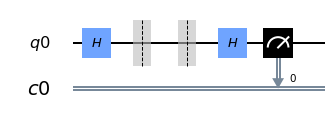

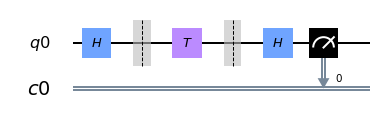

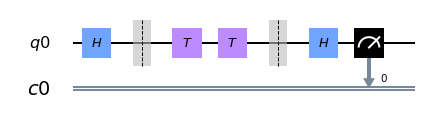

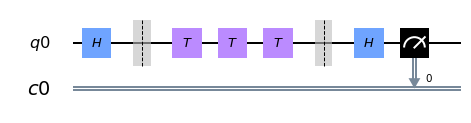

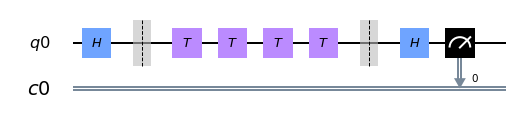

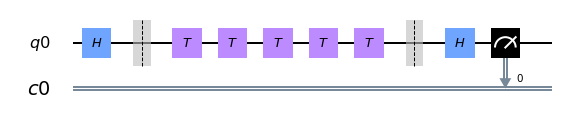

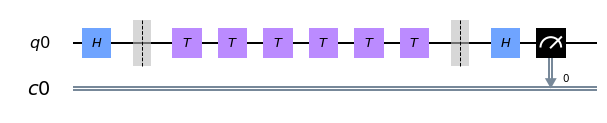

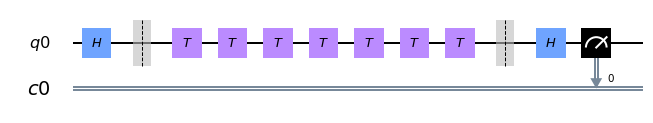

In [6]:
# We need this function to plot inside a loop in a notebook
import matplotlib.pyplot as plt

def show_figure(fig):
    new_fig = plt.figure()
    new_mngr = new_fig.canvas.manager
    new_mngr.canvas.figure = fig
    fig.set_canvas(new_mngr.canvas)
    plt.show(fig)

# Draw the circuits
for circuit in circuits:
    show_figure(circuit.draw(output='mpl'))

In [9]:
# Execute the circuits
shots = 1024
job = execute(circuits, backend = Aer.get_backend('qasm_simulator'), shots=shots)#, seed=8)
result = job.result()

In [10]:
# Print the result
for exp_index in exp_vector:
    data = result.get_counts(circuits[exp_index])
    try:
        p0 = data['0']/shots
    except KeyError:
        p0 = 0
    try:
        p1 = data['1']/shots
    except KeyError:
        p1 = 0
    print('exp {}: [{}, {}] X length = {}'.format(exp_index, p0, p1, p0-p1))

exp 0: [1.0, 0] X length = 1.0
exp 1: [0.8720703125, 0.1279296875] X length = 0.744140625
exp 2: [0.486328125, 0.513671875] X length = -0.02734375
exp 3: [0.13671875, 0.86328125] X length = -0.7265625
exp 4: [0, 1.0] X length = -1.0
exp 5: [0.1328125, 0.8671875] X length = -0.734375
exp 6: [0.494140625, 0.505859375] X length = -0.01171875
exp 7: [0.841796875, 0.158203125] X length = 0.68359375


Asimptotically, with an infininte number of shots, we would get:

| Experiment | Phase angle | Gates | Prob $\ket{0}$ | Prob $\ket{1}$ | X length (Prob $\ket{0}$ - Prob $\ket{1}$) |
|------------|-------------|-------|----------------|----------------|----------|
|    0       | 	0          |	   |	1           |	0            | 1        |
|    1       |	$\pi$/4    |   T   |	0.8535533 	|   0.1464466    | 0.7071067|
|    2       |	$\pi$/2    | T$^2$ |	0.5      	|   0.5          | 0        |
|    3       |	3$\pi$/4   | T$^3$ |	0.1464466 	|   0.8535533 	 | -0.707106|
|    4       |	$\pi$      | T$^4$ |	0       	|   1       	 | -1       |
|    5       |	5$\pi$/4   | T$^5$ |	0.1464466 	|   0.8535533    | -0.707106|
|    6       |	3$\pi$/2   | T$^6$ |	0.5      	|   0.5          | 0        |
|    7       |	7$\pi$/4   | T$^7$ |	0.8535533 	|   0.1464466 	 | 0.7071067|

With these examples, we observed that even if the probability of observing a qubit in a specific state is given by the module of its complex coefficient, modifying the phase of the coefficient can affect this probability. 

From the T operator, it is possible to define additional operators, that help in make the notation more compact when dealing with phase modification:

$ S = T^2 =  
\begin{bmatrix}
    1 & 0 \\
    0 & i 
\end{bmatrix}
$

$ Z = T^4 =   
\begin{bmatrix}
    1 & 0 \\
    0 & -1 
\end{bmatrix}
$

$ S^{\dagger} = T^6 =  
\begin{bmatrix}
    1 & 0 \\
    0 & -i 
\end{bmatrix}
$

$ T^{\dagger} = T^7 =  
\begin{bmatrix}
    1 & 0 \\
    0 & e^{-i \pi/4} 
\end{bmatrix}
$

and

$ Y =   
\begin{bmatrix}
    0 & -i \\
    i & 0 
\end{bmatrix} = 
XZ
$

where:

$ X =   
\begin{bmatrix}
    0 & i \\
    i & 0 
\end{bmatrix} 
$


All the above operators are defined in Qiskit as gates that can be used to operate on the state of qubits.

It is now possible to introduce an additional basis (on top of the computational basis $\{ \ket{0}, \ket{1} \}$ and the superposition basis $\{ \ket{+}, \ket{-} \}$), which we call the circular (or $Y$) basis, defined as:

$\ket{\circlearrowright} = \dfrac{\ket{0} + i \ket{1}}{\sqrt{2}} = 
\dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 \\
    i 
\end{bmatrix} = 
\dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 0 \\
    0 & i 
\end{bmatrix} 
\begin{bmatrix}
    1 \\
    1
\end{bmatrix}= 
\dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 0 \\
    0 & i 
\end{bmatrix}
\begin{bmatrix}
    1 & 1 \\
    1 & -1 
\end{bmatrix}
\begin{bmatrix}
    1 \\
    0 
\end{bmatrix} = 
SH \ket{0}
$ 

$\ket{\circlearrowleft}  = \dfrac{\ket{0} - i \ket{1}}{\sqrt{2}} = 
\dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 \\
    -i 
\end{bmatrix} = 
\dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 0 \\
    0 & -i 
\end{bmatrix} 
\begin{bmatrix}
    1 \\
    1
\end{bmatrix}= 
\dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 0 \\
    0 & -i 
\end{bmatrix}
\begin{bmatrix}
    1 & 1 \\
    1 & -1 
\end{bmatrix}
\begin{bmatrix}
    1 \\
    0 
\end{bmatrix} = 
S^{\dagger}H \ket{0}
$ 